In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import warnings
warnings.simplefilter(action='ignore')

In [8]:
df = pd.read_csv('ELE.csv')

Step No 01 : Undurstand the Business Problem
----
- In the electrical system or utility power factor is very importance to save electrical energy.
- In this dataset we will take and study only relation between Power and Power Factor.
- From the Active, Apparant and Reactive Power we try to calculate Power Factor

In [9]:
df = df[['P_Avg[W]','S_Avg[VA]','Q_Avg[var]','PF_Avg']]
df.head(2)

,P_Avg[W],S_Avg[VA],Q_Avg[var],PF_Avg
0,5810000.0,8600000.0,6340000.0,0.676
1,5880000.0,8700000.0,6410000.0,0.676


Step No 02 : Undurstanding the Data
----
1. Active Power - This is the actual power require to the system work. base on this power most of the electrical equipments are working.
2. Reactive Power - The role of this power and importance of this power is very less as compare to Active power.
3. Apparant Power - addition of Active and Reactive Power
4. Power Factor - Relation between Active and reactive power , PF=1 means reactive power consumption is less and Active power is equal to apparent power

Step No 03 : Data PreProcessing
---
- Data Cleaning
- Data Wrangling
- Featurs Selection
- Data Visualisation

In [10]:
df.isnull().sum()

P_Avg[W]      0
S_Avg[VA]     0
Q_Avg[var]    0
PF_Avg        0
dtype: int64

In [11]:
df.dropna(axis=0, inplace=True)

#Step No 04 : Exploratory Data Analysis

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2678 entries, 0 to 2677
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   P_Avg[W]    2678 non-null   float64
 1   S_Avg[VA]   2678 non-null   float64
 2   Q_Avg[var]  2678 non-null   float64
 3   PF_Avg      2678 non-null   float64
dtypes: float64(4)
memory usage: 83.8 KB


In [13]:
df.describe()

,P_Avg[W],S_Avg[VA],Q_Avg[var],PF_Avg
count,2.678000e+03,2.678000e+03,2.678000e+03,2678.000000
mean,5.800258e+06,8.614033e+06,3.381146e+06,0.249290
std,1.447829e+06,2.118282e+06,5.355190e+06,0.624153
min,1.320000e+06,2.440000e+06,-6.790000e+06,-0.681000
25%,5.050000e+06,7.480000e+06,-3.357500e+06,-0.665000
50%,5.940000e+06,8.790000e+06,6.350000e+06,0.674000
75%,6.990000e+06,1.040000e+07,7.630000e+06,0.676000
max,8.390000e+06,1.250000e+07,9.250000e+06,0.681000


In [14]:
df.corr()

,P_Avg[W],S_Avg[VA],Q_Avg[var],PF_Avg
P_Avg[W],1.000000,0.999325,0.803785,0.772185
S_Avg[VA],0.999325,1.000000,0.808720,0.774546
Q_Avg[var],0.803785,0.808720,1.000000,0.953852
PF_Avg,0.772185,0.774546,0.953852,1.000000


<Axes: >

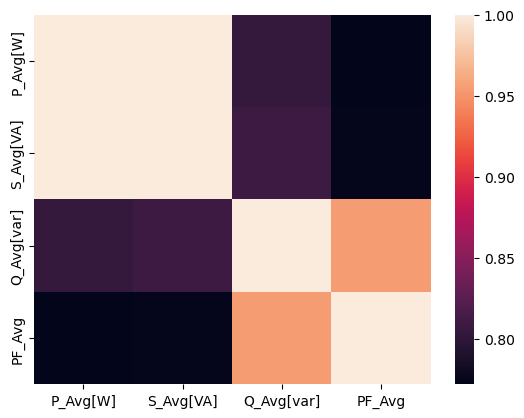

In [15]:
sns.heatmap(df.corr())

<Figure size 200x200 with 0 Axes>

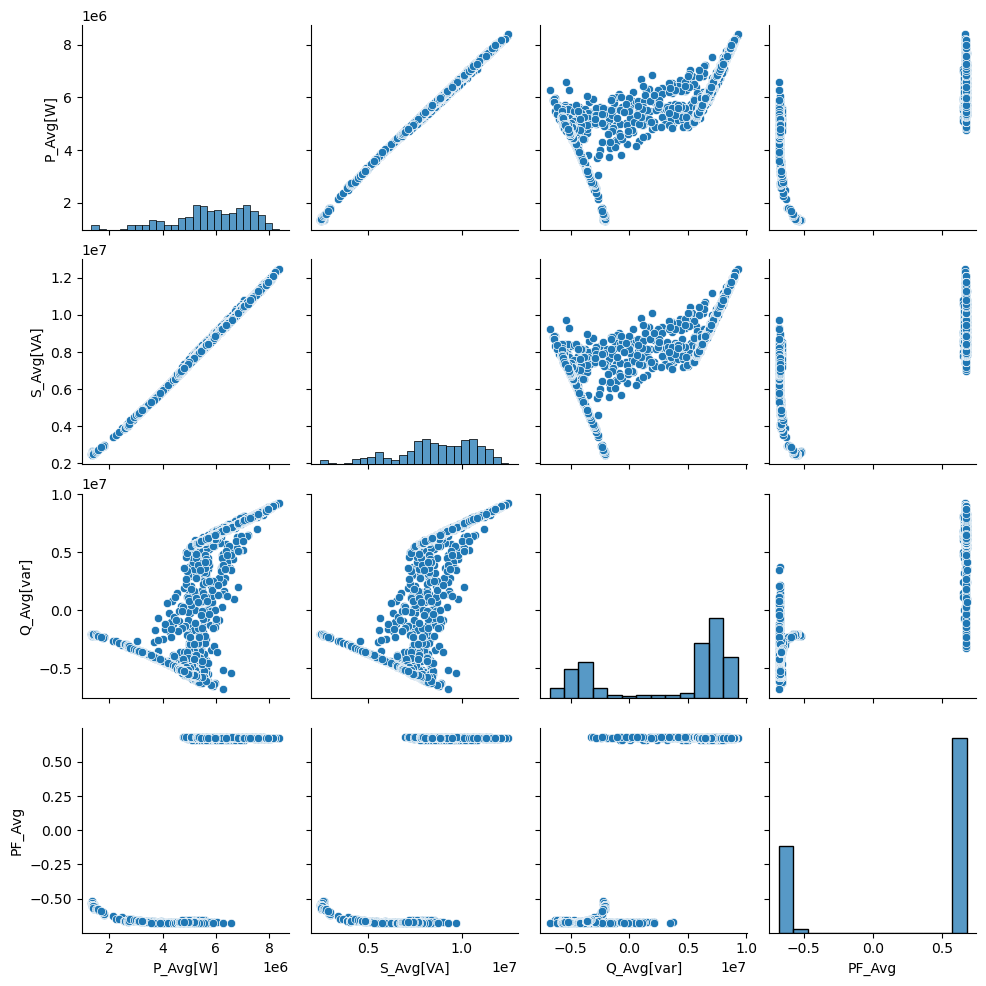

In [16]:
plt.figure(figsize=(2,2))
sns.pairplot(data=df)
plt.show()

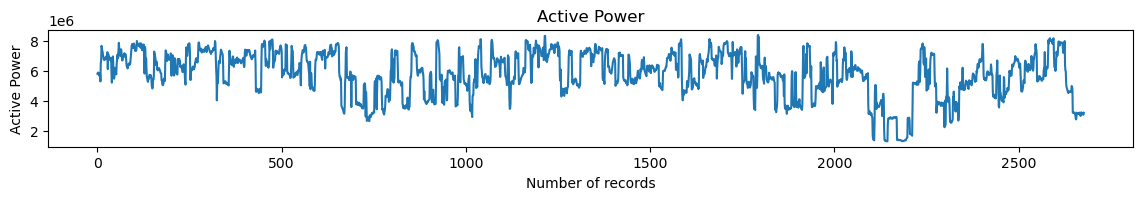

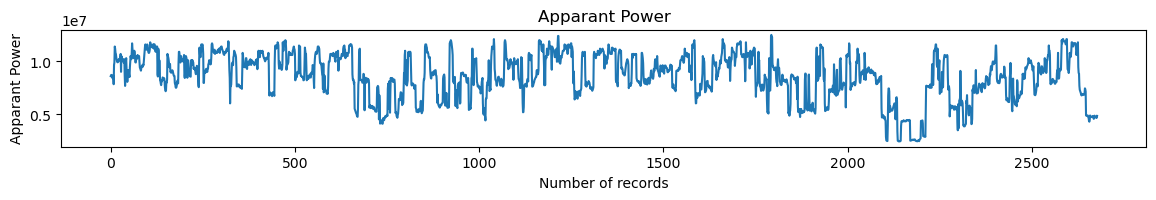

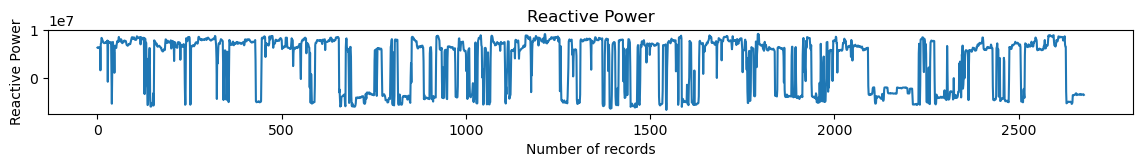

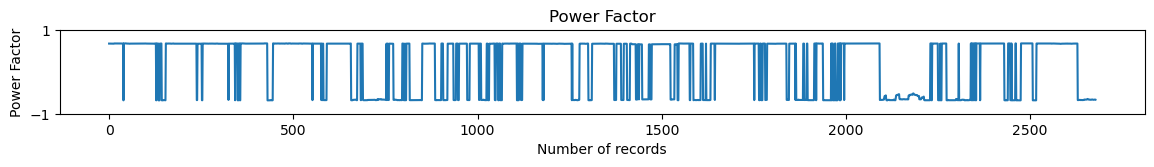

In [17]:
plt.figure(figsize=(14,7))
plt.subplot(4,1,1)
plt.plot(df['P_Avg[W]'])
plt.title("Active Power")
plt.xlabel("Number of records")
plt.ylabel("Active Power")
plt.show()

plt.figure(figsize=(14,7))
plt.subplot(4,1,2)
plt.plot(df['S_Avg[VA]'])
plt.title("Apparant Power")
plt.xlabel("Number of records")
plt.ylabel("Apparant Power")
plt.show()

plt.figure(figsize=(14,5))
plt.subplot(4,1,3)
plt.plot(df['Q_Avg[var]'])
plt.title("Reactive Power")
plt.xlabel("Number of records")
plt.ylabel("Reactive Power")
plt.show()

plt.figure(figsize=(14,5))
plt.subplot(4,1,4)
plt.plot(df['PF_Avg'])
plt.title("Power Factor")
plt.xlabel("Number of records")
plt.ylabel("Power Factor")
plt.yticks([-1,1])
plt.show()

In [ ]:
df['PF_Avg'].mean()

0.24928976848394327

Step No 5 and 6 :  Modelling and Evolution
---

In [ ]:
X=df.drop('PF_Avg', axis=1)
y=df['PF_Avg']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=6)

1. Linear Regression Model
___

In [ ]:
#Modelling
model = LinearRegression()
model.fit(X_train,y_train)

# Model Intercept and Coeficient Value
print("Coeficient : ",model.coef_)
print("Intrcept : ", model.intercept_)
#Prediction
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

#Evolution
MAE = mean_absolute_error(y_test,ypred_test)
MSE = mean_squared_error(y_test,ypred_test)
RMSE = MSE**2
print("MAE : ", MAE)
print("MSE : ", MSE)
print("RMSE : ", RMSE)

#Accuracy
train_accuracy = model.score(X_train,ypred_train)
test_accuracy = model.score(X_test, ypred_test)
print("train_accuracy : ",train_accuracy)
print("test_accuracy : ",test_accuracy)

#Validation score
test_validation_score = cross_val_score(model, X=X_test, y=ypred_test, cv=5).mean()
train_validation_score = cross_val_score(model, X=X_train,y=ypred_train,cv=5).mean()
print("test_validation_score : ",test_validation_score)
print('train_validation_score : ',train_validation_score)

Coeficient :  [ 7.63045955e-07 -5.24733797e-07  1.12860920e-07]
Intrcept :  -0.03234731188365336
MAE :  0.11741588891283924
MSE :  0.03404317269045595
RMSE :  0.001158937606832206
train_accuracy :  1.0
test_accuracy :  1.0
test_validation_score :  1.0
train_validation_score :  1.0


# Model Evaluation Techniques

Condition No 01
- Test Accuracy == Trian accuracy_score

Condition No 02
- Test Accuracy == Cross Validation Score

Condition No 03
- Test Accuracy should satisfy the Business Problem

Condition No 04 :

**For Linear Regression Only**
- Check Linearity of Error
- Check Normality of Error
- Check Equal variace of error
- Check Variable Significance

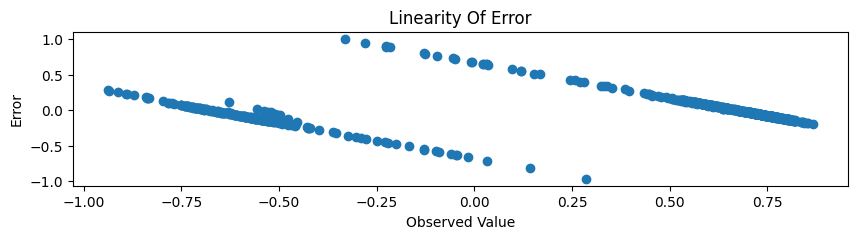

In [ ]:
#Check Linearity of Error
plt.figure(figsize=(10,2))
error = y_test-ypred_test
plt.scatter(ypred_test,error)
plt.xlabel("Observed Value")
plt.ylabel("Error")
plt.title("Linearity Of Error")
plt.show()

Normality can be check with skewness of data :  1.3275216426538279
----------------------------------------------------------------------------------------------------


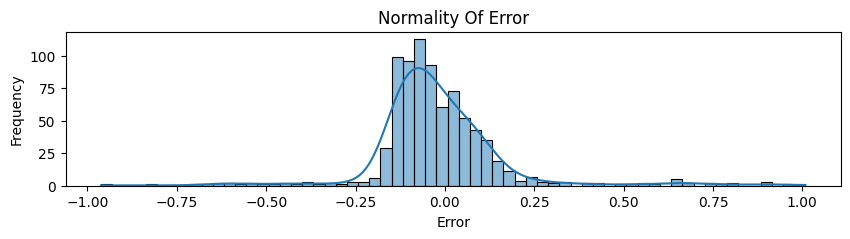

In [ ]:
#Check Normality of Error
print("Normality can be check with skewness of data : ",error.skew())
print("-"*100)
plt.figure(figsize=(10,2))
sns.histplot(error, kde=True)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Normality Of Error")
plt.show()

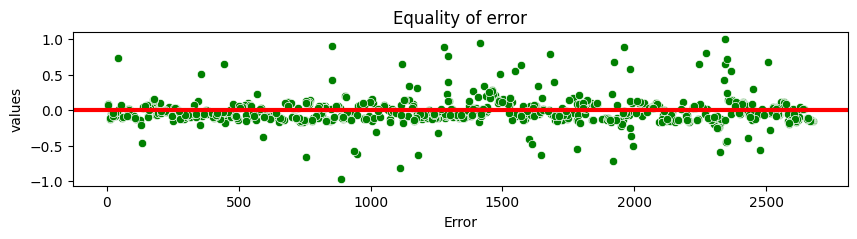

In [ ]:
# Check Equal Variance Of Error
plt.figure(figsize=(10,2))
sns.scatterplot(error,color='g')
plt.axhline(y=0,color="r",linewidth=3)
plt.xlabel("Error")
plt.ylabel("values")
plt.title("Equality of error")
plt.show()

In [ ]:
#Check Variable Significance
model01 = smf.ols('y~X',data=df).fit()
model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     9474.
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:55:12   Log-Likelihood:                 748.14
No. Observations:                2678   AIC:                            -1488.
Df Residuals:                    2674   BIC:                            -1465.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0448      0.024     -1.899      0.058      -0.091       0.001
X[0]        7.716e-07   6.79e-08     11.356      0.000    6.38e-07    9.05e-07
X[1]       -5.298e-07    4.7e-08    -11.278      0.000   -6.22e-07   -4.38e-07
X[2]         1.13e-07   1.15e-09     98.434      0.000    1.11e-07    1.15e-07
==============================================================================
Omnibus:                     1070.526   Durbin-Watson:                   1.501
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11041.754
Skew:                           1.599   Prob(JB):                         0.00
Kurtosis:                      12.420   Cond. No.                     7.79e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.79e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""